
Before running this block, make sure to upload "data.mat" in the google drive.

Assignment No.1:k-nearest neighbors

In [3]:
#Enter your path of dataset from google drive  
import scipy.io as sio
GOOGLE_COLAB = True
path = ""
if GOOGLE_COLAB:
    from google.colab import drive, files
    drive.mount('/content/drive/')
    path = "/content/drive/My Drive/"

dataset = path + "data.mat" 

#Enter path of your test image
test_image=path+"test.jpg"
mat_contents = sio.loadmat(dataset)
mat_contents
images = mat_contents['images']
label = mat_contents['C']
images.shape

Mounted at /content/drive/


(50, 3072)

If you can see the shape of images in 'data.mat' then your data has been read. 

In [10]:
import numpy as np 
images= np.transpose(images)
images.shape
im = np.reshape(images, [ 32, 32, 3, -1], order="F")

(32, 32, 3)


(32, 32, 3)

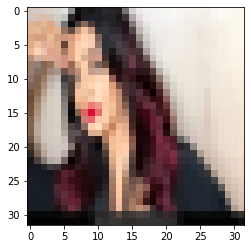

In [12]:
from matplotlib import pyplot as plt
#import cv2

plt.imshow(im[:,:,:,35])
print(im[:,:,:,0].shape)
a= im[:,:,:,35]
plt.imshow(a)
a.shape

You Need to write your code in this block.

[575.2912306  571.28014144 546.34970486 559.25217925 474.5576888
 588.22869702 576.58563978 579.08980305 562.24816585 577.67291783
 571.64324539 584.39883641 560.30259682 573.62967148 533.15382396
 580.59710643 575.74994572 576.77031824 561.44100313 559.90445614
 574.25168698 568.85499031 602.03073011 567.89611726 585.5356522
 582.41136665 562.06138455 564.10016841 571.26613763 590.6030816
 567.7288085  594.77979118 580.17928264 555.20716854 557.51771272
 571.71758763 577.58376016 563.59027671 571.05516371 582.80185312
 568.91211975 571.89509528 573.87542202 578.82380739 563.91134055
 589.48876156 571.93618525 567.88203    567.33940459 575.46763593]


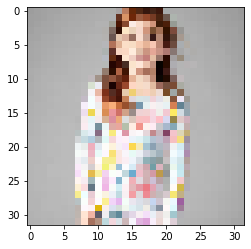

In [131]:
from scipy import misc
import cv2
from math import sqrt
from numpy import ndarray


for i in range(50):
    G = im[:,:,:,i]
    G = np.reshape(G,[-1], order="F")

    #Read your image here
####### Your code here #######

img = cv2.imread(test_image)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)


############################
   

    #Resize your image
####### Your code here #######
resizedimg = cv2.resize(img, (32, 32))
plt.imshow(resizedimg)
resizedimg.shape
##############################
   
   
    #Reshape your image as we reshape the image of dataset
####### Your code here #######
#flattening image
flatimg = np.reshape(resizedimg, [3072, 1], order="F")
flatimg.shape
#############################
    #Calculate Eucleadian distance between your image and dataset 
####### Your code here #######


def euclidean_distance(row1, row2):
  distance = 0.0
  for i in range(len(row1)-1):
    distance = distance + (row1[i] - row2[i])**2
  return sqrt (distance)     

# print(len(flatimg[0:3072, 0]))
# print(len(flatimg[0, 0:3072]))

# print(len(selectedimg[0:3072, 0]))
# print(len(selectedimg[0, 0:3072]))

#print(len(flatimg))


# selectedimg = images[0:3072,0]
# edistance = euclidean_distance(flatimg, selectedimg)
# edistance

edistance = np.zeros(50)
for i in range(50):
  selectedimg = images[0:3072,i]
  edistance[i] = euclidean_distance(flatimg, selectedimg)
  
print(edistance) 





##############################

In this Block you need to fill the code for 1-NN. 


474.55768880084537
4


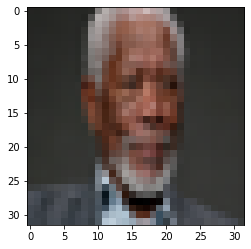

In [106]:
# Write code for 1 NN
#Find min distance
#Fine at which point min value exists

####### Your code here #######
leastedistance = min(edistance)
print(leastedistance)

ind = np.argmin(edistance)
print(ind)
plt.imshow(im[:,:,:,ind])

##############################


Write code for 3 NN


474.55768880084537
533.1538239570265
546.3497048594426
4
14
2


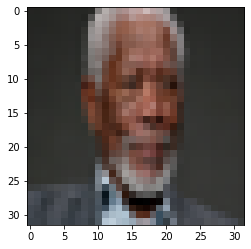

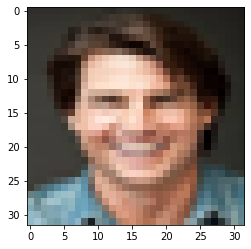

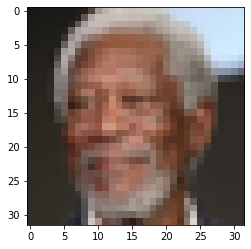

In [129]:
#3 NN
#Write code for 3 NN
#Find 3 min distances
#Find their instances
#hint: Use for Loop

####### Your code here #######
A, B, C = np.partition(edistance, 1)[0:3]
print(A)
print(B)
print(C)

indA = np.where(edistance == A)
print(indA[0].item(0))
plt.figure()
plt.imshow(im[:,:,:,indA[0].item(0)])

indB = np.where(edistance == B)
print(indB[0].item(0))
plt.figure()
plt.imshow(im[:,:,:,indB[0].item(0)])

indC = np.where(edistance == C)
print(indC[0].item(0))
plt.figure()
plt.imshow(im[:,:,:,indC[0].item(0)])



##############################

Write code for 5 NN

474.55768880084537
533.1538239570265
546.3497048594426
559.2521792536887
575.2912305954263
4
14
2
2
2


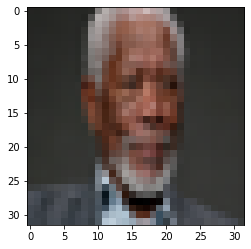

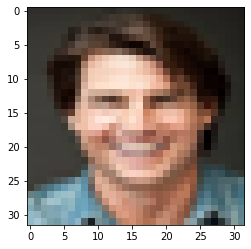

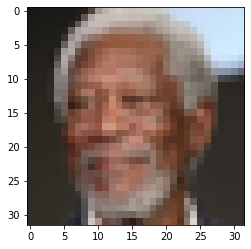

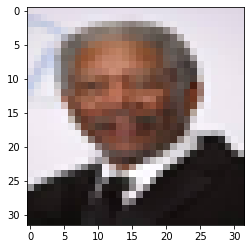

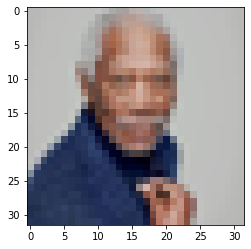

In [130]:
#Write code for 5 NN
#Find 5 min distances
#Find their instances

####### Your code here #######

A, B, C, D, E = np.partition(edistance, 1)[0:5]
print(A)
print(B)
print(C)
print(D)
print(E)

indA = np.where(edistance == A)
print(indA[0].item(0))
plt.figure()
plt.imshow(im[:,:,:,indA[0].item(0)])

indB = np.where(edistance == B)
print(indB[0].item(0))
plt.figure()
plt.imshow(im[:,:,:,indB[0].item(0)])

indC = np.where(edistance == C)
print(indC[0].item(0))
plt.figure()
plt.imshow(im[:,:,:,indC[0].item(0)])

indD = np.where(edistance == D)
print(indC[0].item(0))
plt.figure()
plt.imshow(im[:,:,:,indD[0].item(0)])

indE = np.where(edistance == E)
print(indC[0].item(0))
plt.figure()
plt.imshow(im[:,:,:,indE[0].item(0)])



##############################